https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset/data

# Importing Libraries:

In [1]:
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler,LabelEncoder
import plotly.express as px
import numpy as np 
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
import scipy.stats as stats
# Suppress all warnings
warnings.filterwarnings("ignore")

# Loading the Dataset:

In [2]:
# Loading Data
df = pd.read_csv('Automobile.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


# EDA:

In [3]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


The dataset contains 398 entries with some missing values in the 'horsepower' column. Overall, it provides a comprehensive overview of car attributes and can be useful for various analyses related to automotive performance and characteristics.         


li>
</ul>


In [4]:
df = df.dropna(subset=['horsepower'])

In [5]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

This suggests that the dataset is complete in terms of the specified attributes, which is essential for accurate analysis and modeling. It implies that all required information is available for each entry in the dataset, ensuring the reliability of any insights drawn from the data.

In [6]:
# Descriptive Information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [7]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")
   
# Example usage:
explore_data(df)

Major Moments:
                     Mean   Median  Standard Deviation  Skewness  Kurtosis
mpg             23.445918    22.75            7.805007  0.457092 -0.515993
cylinders        5.471939     4.00            1.705783  0.508109 -1.398199
displacement   194.411990   151.00          104.644004  0.701669 -0.778317
horsepower     104.469388    93.50           38.491160  1.087326  0.696947
weight        2977.584184  2803.50          849.402560  0.519586 -0.809259
acceleration    15.541327    15.50            2.758864  0.291587  0.444234
model_year      75.979592    76.00            3.683737  0.019688 -1.167446




This statistical summary offers a comprehensive overview of the numerical attributes within your dataset. It begins by presenting the mean values, which serve as a measure of central tendency, indicating the typical value for each feature. The median values provide additional insight into the distribution by identifying the middle value of the dataset. Standard deviation values highlight the dispersion or variability around the mean, helping to assess the spread of the data points. Skewness measures the asymmetry of the distribution, with positive values indicating a right skew and negative values indicating a left skew. Kurtosis, on the other hand, assesses the peakedness of the distribution, where positive values signify a more peaked distribution and negative values imply a flatter distribution compared to a normal distribution. 

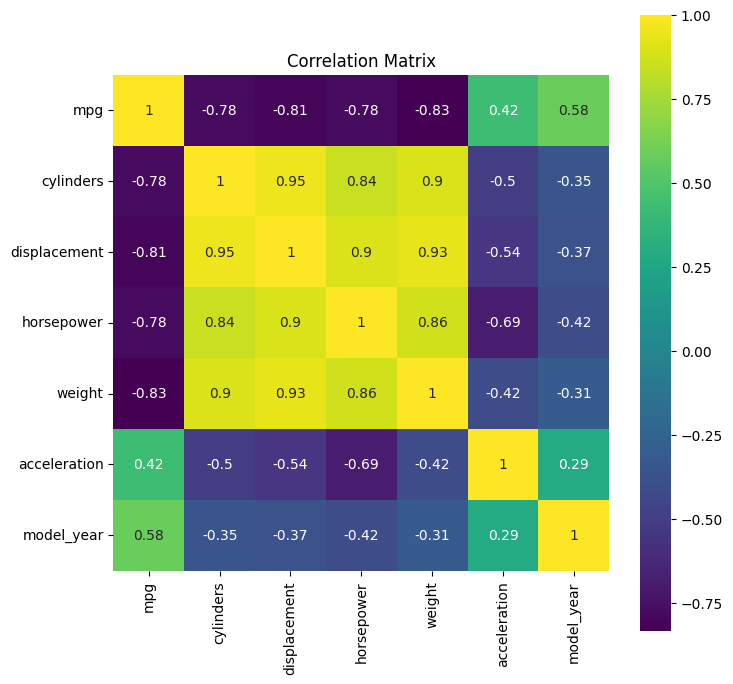

In [8]:
def plot_correlation_matrix(dataframe):
    """
    Plot the correlation matrix for a given DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.

    Returns:
    None

    Example:
    plot_correlation_matrix(df)
    """
    plt.figure(figsize=(8, 8))
    sns.heatmap(dataframe.corr(), cmap='viridis', annot=True, cbar=True, square=True)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df)

<ul>
    <li>
        <strong>mpg (miles per gallon):</strong> exhibits strong negative correlations with 'cylinders', 'displacement', 'horsepower', and 'weight'. This implies that as the number of cylinders, displacement, horsepower, and weight increase, the miles per gallon generally decreases, which is a logical expectation in automobile engineering.
    </li>
    <li>
        <strong>Cylinders, displacement, horsepower, and weight:</strong> display strong positive correlations among themselves, which is also expected given their interrelatedness in determining engine performance and vehicle size.
    </li>
    <li>
        <strong>Acceleration:</strong> demonstrates weak positive correlations with 'mpg' and 'model_year', suggesting a slight tendency for higher acceleration to be associated with higher miles per gallon and more recent model years.
    </li>
    <li>
        <strong>Model_year:</strong> exhibits moderate positive correlations with 'mpg' and 'acceleration', indicating a mild association between newer model years and improved fuel efficiency as well as acceleration.
    </li>
</ul>


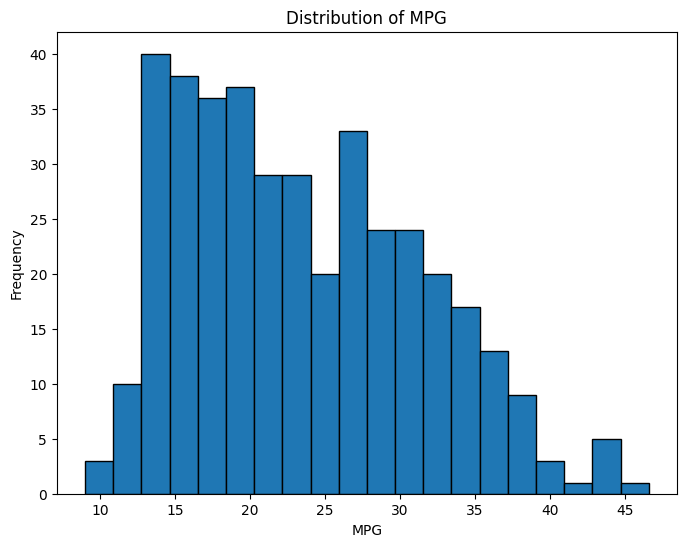

In [9]:
def plot_mpg_distribution(data, bins=20):
    """
    Plot the distribution of MPG (miles per gallon) values.

    Parameters:
    - data (Series or array-like): The data containing MPG values.
    - bins (int): Number of bins for histogram. Default is 20.
    Returns:
    - None
    """
    plt.figure(figsize=(8, 6))
    plt.hist(data['mpg'], bins=20, edgecolor='black')
    plt.xlabel('MPG')
    plt.ylabel('Frequency')
    plt.title('Distribution of MPG')
    plt.show()
plot_mpg_distribution(df)

In this specific dataset, the histogram illustrates the frequency of automobiles corresponding to various MPG values. The distribution typically forms a bell-shaped curve, with the peak indicating the most common MPG range among the vehicles. Analyzing the shape and spread of the histogram allows us to assess the prevalence of fuel-efficient vehicles and outliers with unusually high or low MPG values.



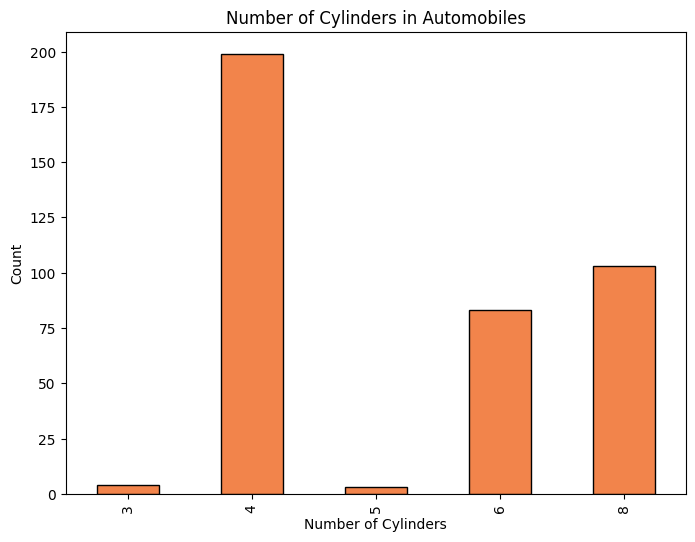

In [10]:
def plot_cylinder_counts(data, cmap='plasma'):
    """
    Plot the count of automobiles for each number of cylinders.

    Parameters:
    - data (Series or array-like): The data containing cylinder counts.
    - cmap (str): Colormap for the plot. Default is 'plasma'.

    Returns:
    - None
    """
    plt.figure(figsize=(8, 6))
    data['cylinders'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color=plt.get_cmap(cmap)(0.7))
    plt.xlabel('Number of Cylinders')
    plt.ylabel('Count')
    plt.title('Number of Cylinders in Automobiles')
    plt.show()

plot_cylinder_counts(df)

In this specific dataset, the plot reveals that automobiles with four cylinders are the most prevalent, followed by those with six and eight cylinders. This distribution aligns with common trends in the automotive industry, where vehicles with four-cylinder engines are often favored for their balance of performance and fuel efficiency, particularly in compact and midsize car segments.

The dominance of four-cylinder automobiles suggests a widespread adoption of this configuration, potentially influenced by factors such as regulatory standards, technological advancements, and consumer preferences. On the other hand, the presence of vehicles with six and eight cylinders indicates a market demand for higher-performance models or vehicles designed for specific purposes such as towing or hauling.



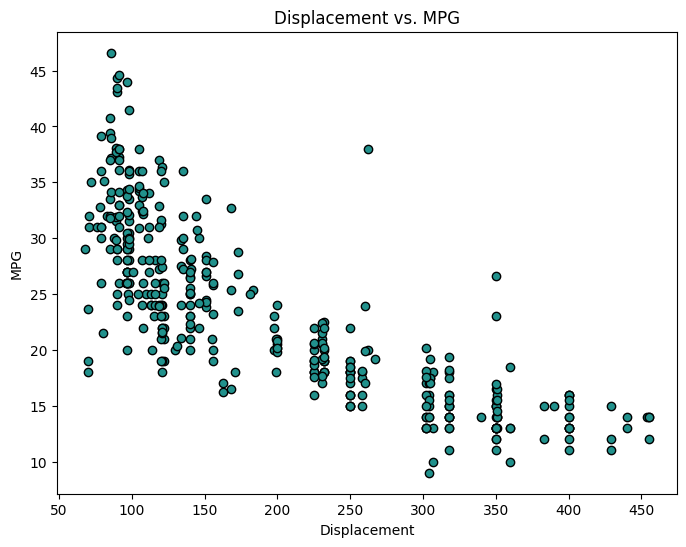

In [11]:
def plot_displacement_vs_mpg(data, cmap='viridis'):
    """
    Plot the relationship between engine displacement and fuel efficiency.

    Parameters:
    - data (DataFrame): The data containing displacement and MPG values.
    - cmap (str): Colormap for the plot. Default is 'viridis'.

    Returns:
    - None
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data['displacement'], data['mpg'], c=plt.get_cmap(cmap)(0.5), edgecolor='black')
    plt.xlabel('Displacement')
    plt.ylabel('MPG')
    plt.title('Displacement vs. MPG')
    plt.show()
plot_displacement_vs_mpg(df)

Firstly, examining the distribution of data points reveals a general trend where higher engine displacements tend to correspond to lower fuel efficiency, indicated by lower MPG values. This observation aligns with the common understanding in automotive engineering that larger engines typically consume more fuel to generate power, resulting in decreased efficiency.

Additionally, while there is a noticeable negative correlation between engine displacement and MPG, the plot also showcases some variability in fuel efficiency within specific ranges of engine displacement. This variability may be attributed to other factors such as engine technology, vehicle weight, aerodynamics, and driving conditions, which can influence fuel consumption independently of engine size.

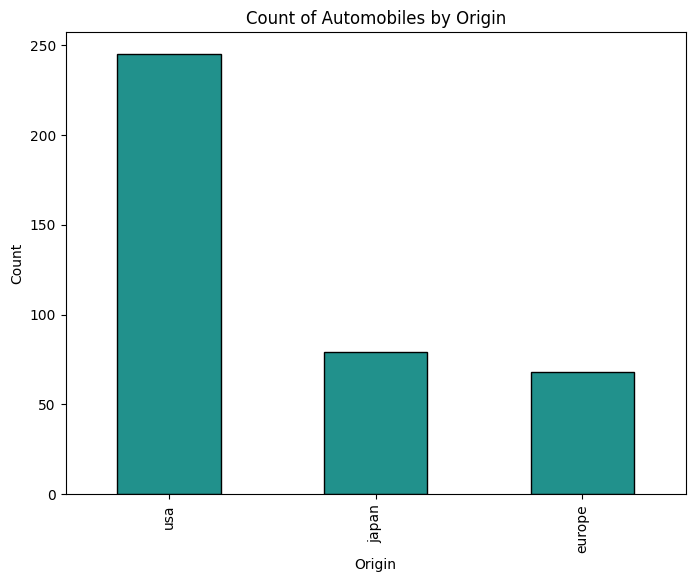

In [12]:
def plot_origin(data, cmap='viridis'):
    """
    Plot the count of automobiles for each country or region of origin.

    Parameters:
    - data (DataFrame): The data containing the 'origin' column.
    - cmap (str): Colormap for the plot. Default is 'viridis'.

    Returns:
    - None
    """
    plt.figure(figsize=(8, 6))
    data['origin'].value_counts().plot(kind='bar', edgecolor='black', color=plt.get_cmap(cmap)(0.5))
    plt.xlabel('Origin')
    plt.ylabel('Count')
    plt.title('Count of Automobiles by Origin')
    plt.show()

plot_origin(df)

By examining the heights of the bars, it becomes evident that the United States has the highest representation of automobiles by a significant margin, followed by Japan and Europe. This observation suggests that the United States has a substantial presence in the automotive market, potentially reflecting factors such as historical manufacturing dominance, consumer preferences, and economic factors.

The prominence of the United States in automobile representation underscores its significance as a key player in the global automotive industry. Conversely, while Japan and Europe also exhibit notable counts of automobiles, they trail behind the United States, indicating a relative difference in market penetration or automotive production levels.

# Clustering:

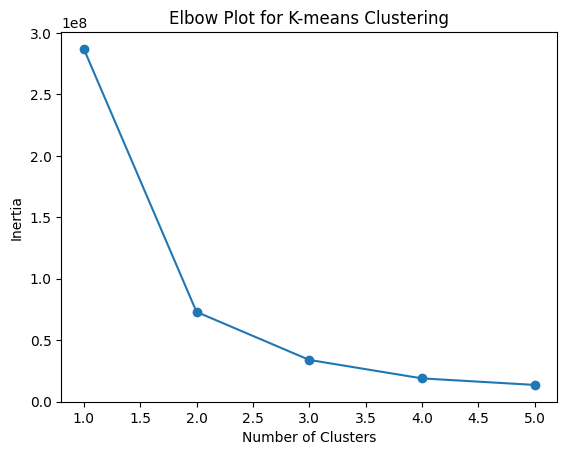

In [13]:
def generate_elbow_plot(data, max_clusters=10):
    """
    Generates an elbow plot to determine the optimal number of clusters for K-means clustering.

    Parameters:
    - data (DataFrame): Input data for clustering.
    - max_clusters (int): Maximum number of clusters to consider. Default is 10.

    Returns:
    - None
    """
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot for K-means Clustering')
    plt.show()

generate_elbow_plot(df.drop(columns=['name', 'origin']), max_clusters=5)

In this plot, we observe a clear elbow point at around 2 or 3 clusters, where the inertia sharply decreases and then levels off. This indicates that adding more clusters beyond this point does not significantly decrease the inertia, suggesting diminishing returns in terms of capturing the data's variability. Therefore, based on this plot, we would likely choose 2 or 3 clusters for the K-means clustering algorithm.









In [14]:
def train_kmeans_model(data, num_clusters):
    """
    Trains a K-means clustering model on the input data.

    Parameters:
    - data (DataFrame): Input data for clustering.
    - num_clusters (int): Number of clusters to create.

    Returns:
    - trained_model: Trained K-means clustering model.
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_data)

    return kmeans

num_clusters = 3  # Example choice of number of clusters
kmeans_model = train_kmeans_model(df.drop(columns=['name', 'origin']), num_clusters)

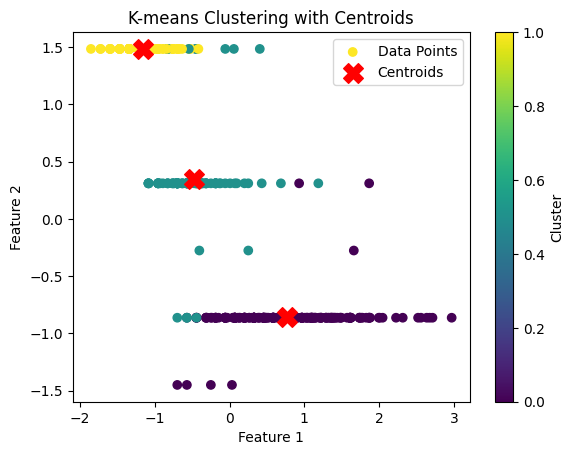

In [15]:
def visualize_clusters_with_centroids(data, model):
    """
    Visualizes the clusters formed by the trained K-means model along with centroids.

    Parameters:
    - data (DataFrame): Input data used for clustering.
    - model: Trained K-means clustering model.

    Returns:
    - None
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    predicted_labels = model.predict(scaled_data)
    centroids = model.cluster_centers_

    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=predicted_labels, cmap='viridis', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.title('K-means Clustering with Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()

# Example usage:
visualize_clusters_with_centroids(df.drop(columns=['name', 'origin']), kmeans_model)

This plot visualizes the clusters formed by a K-means clustering algorithm along with their centroids. Each data point is represented by a colored dot, where the color indicates the cluster to which it belongs. The centroids of each cluster are marked with red 'X' symbols. The color bar on the right side indicates the cluster index.

The clustering appears to be well-defined, with distinct clusters formed based on the features represented on the x and y axes. The centroids are positioned at the centers of their respective clusters, providing a clear indication of the cluster centers. Overall, this visualization effectively illustrates the clustering structure and the positions of the centroids within the feature space.

# Linear Regression:

In [16]:
def preprocess_data_and_split(data, target_column='mpg', test_size=0.2, random_state=42):
    """
    Preprocesses the data by encoding categorical variables and splitting it into training and testing sets.

    Parameters:
    - data (DataFrame): The input DataFrame containing features and target variable.
    - target_column (str): The name of the target variable column. Default is 'mpg'.
    - test_size (float): The proportion of the dataset to include in the test split. Default is 0.2.
    - random_state (int): Controls the shuffling applied to the data before splitting. Default is 42.

    Returns:
    - X_train (DataFrame): Training features.
    - X_test (DataFrame): Testing features.
    - y_train (Series): Training target variable.
    - y_test (Series): Testing target variable.
    """
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Encode categorical variable 'origin'
    data['origin'] = label_encoder.fit_transform(data['origin'])
    
    # Split features and target variable
    X = data.drop(['name', target_column], axis=1)
    y = data[target_column]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_data_and_split(df)

In [17]:
def train_linear_regression_model(X_train, y_train):
    """
    Trains a linear regression model using the given training data.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (Series): Training target variable.

    Returns:
    - model (LinearRegression): Trained linear regression model.
    """
    # Initialize and train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return model

model = train_linear_regression_model(X_train, y_train)

In [18]:
def evaluate_regression_model(model, X_test, y_test):
    """
    Evaluates the performance of a regression model on the test data.

    Parameters:
    - model: Trained regression model.
    - X_test (DataFrame): Testing features.
    - y_test (Series): Testing target variable.

    Returns:
    - None
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    # Print evaluation metrics
    print("R-squared score:", r2)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("Explained Variance Score:", evs)

evaluate_regression_model(model, X_test, y_test)

R-squared score: 0.792434089541155
Mean Squared Error (MSE): 10.594285130533125
Root Mean Squared Error (RMSE): 3.2548863467920235
Mean Absolute Error (MAE): 2.567137794432377
Explained Variance Score: 0.7950906481732918


The regression model appears to perform well, as indicated by the R-squared score of 0.79, suggesting that about 79% of the variance in the dependent variable is explained by the independent variable(s). The mean squared error (MSE) of 10.59, root mean squared error (RMSE) of 3.25, and mean absolute error (MAE) of 2.57 demonstrate that, on average, the model's predictions are relatively close to the actual values. The explained variance score further reinforces the model's ability to capture the underlying patterns in the data, with approximately 79.5% of the variance accounted for. 

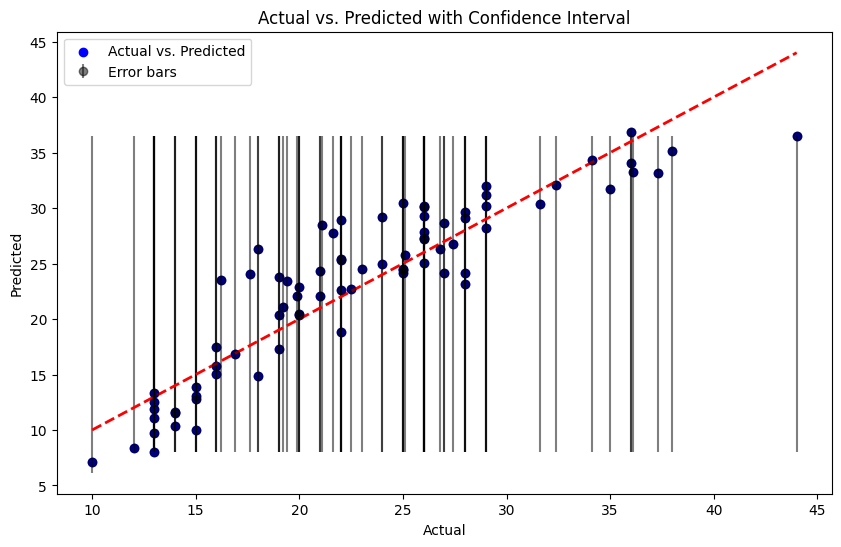

In [19]:
from sklearn.utils import resample

def visualize_line_fitting_with_confidence_interval(model, X_test, y_test, confidence=0.95, n_bootstraps=1000):
    """
    Visualizes the line fitting of the regression model on the test data with error bars and confidence intervals.

    Parameters:
    - model: Trained regression model.
    - X_test (DataFrame): Testing features.
    - y_test (Series): Testing target variable.
    - confidence (float): Confidence level for the confidence interval. Default is 0.95.
    - n_bootstraps (int): Number of bootstrap samples to use for estimating confidence intervals. Default is 1000.

    Returns:
    - None
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate prediction intervals using bootstrapping
    bootstrap_indices = resample(np.arange(len(y_test)), n_samples=n_bootstraps)
    y_pred_bootstrapped = model.predict(X_test.iloc[bootstrap_indices])
    confidence_lower = np.percentile(y_pred_bootstrapped, (1 - confidence) / 2 * 100)
    confidence_upper = np.percentile(y_pred_bootstrapped, (1 + confidence) / 2 * 100)
    
    # Plot actual vs. predicted values with error bars and confidence intervals
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
    plt.errorbar(y_test, y_pred, yerr=[np.abs(y_pred - confidence_lower), np.abs(confidence_upper - y_pred)], fmt='o', color='black', alpha=0.5, label='Error bars')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted with Confidence Interval')
    plt.legend()
    plt.show()

visualize_line_fitting_with_confidence_interval(model, X_test, y_test)

The plot illustrates the performance of a regression model by comparing the actual values against the model's predictions. The close alignment of the blue dots with the dashed red line suggests that the model generally performs well in capturing the underlying patterns in the data. However, the presence of error bars indicates the uncertainty associated with each prediction. The length of the error bars varies across different data points, reflecting the variability in the model's accuracy. In some cases, the error bars are quite long, indicating higher uncertainty and potential areas for improvement.